In [1]:
#import required library for accessing data model
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn import metrics

cuidata = pd.read_csv('datamodel110121.csv')
cuidata.head(5)

,LineID,tempc,dia,cuicr,cyclic,insul,nomwt,meas,pof,pofact
0,100-PHL-352-BBA-01,15,100,0.11,0,1,6.02,4.00,2,1
1,300-PHL-001-CBD-16,100,300,0.49,0,2,9.52,0.80,5,5
2,350-PHL-002-CBD-16,100,350,0.11,0,2,9.52,7.53,1,4
3,250-PHL-003-CBD-16,100,250,0.13,0,2,9.27,7.00,1,3
4,250-PHL-004-CBD-16,100,250,0.16,0,2,9.27,6.50,1,4


In [2]:
#checking imported data shape
cuidata.shape

(111, 10)

Text(0, 0.5, 'Testing Accuracy')

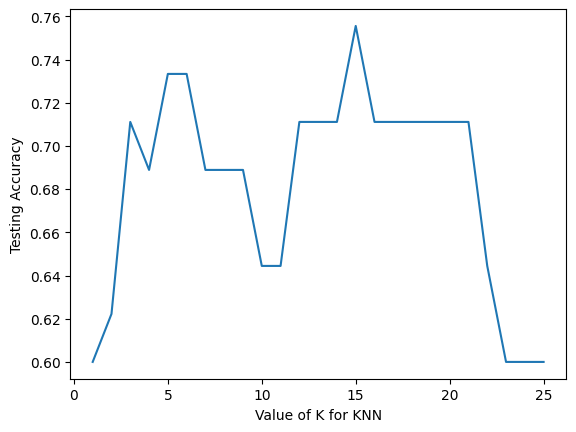

In [3]:
#define feature column or parameter that being utilized for prediction
feature_col = ['tempc', 'dia', 'cuicr', 'cyclic', 'insul', 'nomwt', 'meas']
X = cuidata[feature_col]

y = cuidata['pof']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [4]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print('Nilai akurasi maksimum untuk KNN adalah')
print(metrics.accuracy_score(y_test, y_pred2))
print('Nilai R2 untuk KNN adalah')
print(metrics.r2_score(y_test, y_pred2))

Nilai akurasi maksimum untuk KNN adalah
0.7555555555555555
Nilai R2 untuk KNN adalah
0.42660550458715596


Text(0, 0.5, 'Testing Accuracy')

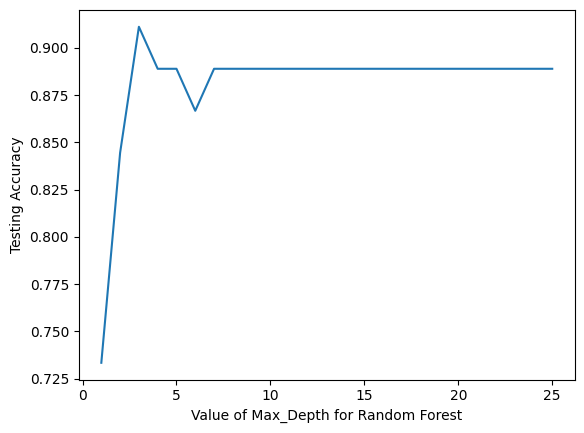

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

r_range = list(range(1, 26))
scores = []
for r in r_range:
    rfc = RandomForestClassifier(max_depth=r, random_state=0)
    rfc.fit(X_train, y_train)
    y_predrf = rfc.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_predrf))

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(r_range, scores)
plt.xlabel('Value of Max_Depth for Random Forest')
plt.ylabel('Testing Accuracy')

In [6]:
rfc = RandomForestClassifier(max_depth=3, random_state=0)
rfc.fit(X_train, y_train)
y_predrf = rfc.predict(X_test)

print('Nilai akurasi maksimum untuk RF adalah')
print(metrics.accuracy_score(y_test, y_predrf))
print('Nilai R2 untuk RF adalah')
print(metrics.r2_score(y_test, y_predrf))

Nilai akurasi maksimum untuk RF adalah
0.9111111111111111
Nilai R2 untuk RF adalah
0.9464831804281346


Text(0, 0.5, 'Testing Accuracy')

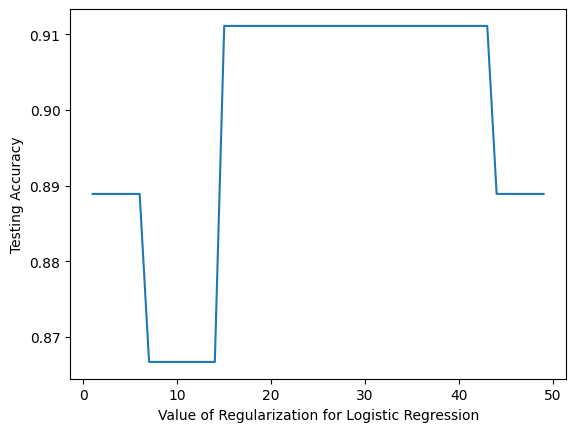

In [7]:
from sklearn.linear_model import LogisticRegression

# try K=1 through K=25 and record testing accuracy
c_range = list(range(1, 50))
scores = []
for c in c_range:
    logreg = LogisticRegression(solver='newton-cg',C=c, random_state=0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(c_range, scores)
plt.xlabel('Value of Regularization for Logistic Regression')
plt.ylabel('Testing Accuracy')

In [8]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='newton-cg',C=15.0, random_state=0)
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred3 = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print('Nilai akurasi maksimum untuk LR adalah')
print(metrics.accuracy_score(y_test, y_pred3))
print('Nilai R2 untuk LR adalah')
print(metrics.r2_score(y_test, y_pred3))

Nilai akurasi maksimum untuk LR adalah
0.9111111111111111
Nilai R2 untuk LR adalah
0.9235474006116208


In [10]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    pof   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     82.70
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           2.21e-39
Time:                        20:28:15   Log-Likelihood:                -105.26
No. Observations:                 111   AIC:                             226.5
Df Residuals:                     103   BIC:                             248.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2073      0.528     13.653      0.0

# 2.0 Parameter Sensitisasi

##  2.1 Variasi 2 - 6 Parameter

In [ ]:
#define feature column or parameter that being utilized for prediction
feature_col = ['tempc', 'dia', 'cyclic', 'insul', 'nomwt', 'meas']
X = cuidata[feature_col]

y = cuidata['pof']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print('Nilai akurasi maksimum untuk KNN adalah')
print(metrics.accuracy_score(y_test, y_pred2))
print('Nilai R2 untuk KNN adalah')
print(metrics.r2_score(y_test, y_pred2))

In [ ]:
# try K=1 through K=25 and record testing accuracy
c_range = list(range(1, 31))
scores = []
for c in c_range:
    logreg = LogisticRegression(solver='newton-cg',C=c, random_state=0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(c_range, scores)
plt.xlabel('Value of Regularization for Logistic Regression')
plt.ylabel('Testing Accuracy')

from sklearn.linear_model import LogisticRegression

# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='newton-cg',C=15.0, random_state=0)
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred3 = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print('Nilai akurasi maksimum untuk LR adalah')
print(metrics.accuracy_score(y_test, y_pred3))
print('Nilai R2 untuk LR adalah')
print(metrics.r2_score(y_test, y_pred3))

## 2.2 Variasi 3 - 5 Parameter

In [ ]:
#define feature column or parameter that being utilized for prediction
feature_col = ['tempc', 'dia', 'cyclic', 'insul', 'meas']
X = cuidata[feature_col]

y = cuidata['pof']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print('Nilai akurasi maksimum untuk KNN adalah')
print(metrics.accuracy_score(y_test, y_pred2))
print('Nilai R2 untuk KNN adalah')
print(metrics.r2_score(y_test, y_pred2))

In [ ]:
# try K=1 through K=25 and record testing accuracy
c_range = list(range(1, 31))
scores = []
for c in c_range:
    logreg = LogisticRegression(solver='newton-cg',C=c, random_state=0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(c_range, scores)
plt.xlabel('Value of Regularization for Logistic Regression')
plt.ylabel('Testing Accuracy')

from sklearn.linear_model import LogisticRegression

# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='newton-cg',C=4.0, random_state=0)
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred3 = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print('Nilai akurasi maksimum untuk LR adalah')
print(metrics.accuracy_score(y_test, y_pred3))
print('Nilai R2 untuk LR adalah')
print(metrics.r2_score(y_test, y_pred3))

# 2.3 Variasi 4 - 4 Parameter

In [ ]:
#define feature column or parameter that being utilized for prediction
feature_col = ['tempc', 'dia', 'cyclic', 'insul']
X = cuidata[feature_col]

y = cuidata['pof']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print('Nilai akurasi maksimum untuk KNN adalah')
print(metrics.accuracy_score(y_test, y_pred2))
print('Nilai R2 untuk KNN adalah')
print(metrics.r2_score(y_test, y_pred2))

In [ ]:
# try K=1 through K=25 and record testing accuracy
c_range = list(range(1, 31))
scores = []
for c in c_range:
    logreg = LogisticRegression(solver='newton-cg',C=c, random_state=0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(c_range, scores)
plt.xlabel('Value of Regularization for Logistic Regression')
plt.ylabel('Testing Accuracy')

from sklearn.linear_model import LogisticRegression

# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='newton-cg',C=2.0, random_state=0)
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred3 = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print('Nilai akurasi maksimum untuk LR adalah')
print(metrics.accuracy_score(y_test, y_pred3))
print('Nilai R2 untuk LR adalah')
print(metrics.r2_score(y_test, y_pred3))

# 2.4 Variasi 5 - 3 Parameter

In [ ]:
#define feature column or parameter that being utilized for prediction
feature_col = ['tempc', 'cyclic', 'insul']
X = cuidata[feature_col]

y = cuidata['pof']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print('Nilai akurasi maksimum untuk KNN adalah')
print(metrics.accuracy_score(y_test, y_pred2))
print('Nilai R2 untuk KNN adalah')
print(metrics.r2_score(y_test, y_pred2))

In [ ]:
# try K=1 through K=25 and record testing accuracy
c_range = list(range(1, 31))
scores = []
for c in c_range:
    logreg = LogisticRegression(solver='newton-cg',C=c, random_state=0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(c_range, scores)
plt.xlabel('Value of Regularization for Logistic Regression')
plt.ylabel('Testing Accuracy')

from sklearn.linear_model import LogisticRegression

# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='newton-cg',C=3.0, random_state=0)
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred3 = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print('Nilai akurasi maksimum untuk LR adalah')
print(metrics.accuracy_score(y_test, y_pred3))
print('Nilai R2 untuk LR adalah')
print(metrics.r2_score(y_test, y_pred3))

# 2.5 Variasi 6 - 2 Parameter

In [ ]:
#define feature column or parameter that being utilized for prediction
feature_col = ['tempc', 'insul']
X = cuidata[feature_col]

y = cuidata['pof']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

from sklearn.neighbors import KNeighborsClassifier

# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print('Nilai akurasi maksimum untuk KNN adalah')
print(metrics.accuracy_score(y_test, y_pred2))
print('Nilai R2 untuk KNN adalah')
print(metrics.r2_score(y_test, y_pred2))

In [ ]:
# try K=1 through K=25 and record testing accuracy
c_range = list(range(1, 31))
scores = []
for c in c_range:
    logreg = LogisticRegression(solver='newton-cg',C=c, random_state=0)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# plot the relationship between K and testing accuracy
plt.plot(c_range, scores)
plt.xlabel('Value of Regularization for Logistic Regression')
plt.ylabel('Testing Accuracy')

from sklearn.linear_model import LogisticRegression

# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='newton-cg',C=3.0, random_state=0)
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred3 = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print('Nilai akurasi maksimum untuk LR adalah')
print(metrics.accuracy_score(y_test, y_pred3))
print('Nilai R2 untuk LR adalah')
print(metrics.r2_score(y_test, y_pred3))